In [1]:
from google.colab import files
uploaded = files.upload()

Saving Wine.csv to Wine.csv


In [2]:
import pandas as pd

df = pd.read_csv('Wine.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [3]:
df.shape

(178, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [8]:
X = df.loc[:,['Alcohol','Total_Phenols']] # мб и другие столбики надо брать
y = df['Customer_Segment']

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

Y_pred = kmeans.labels_
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1,
       0, 1, 0, 1, 2, 0, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 0], dtype=int32)

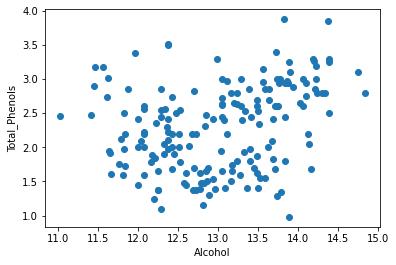

In [12]:
import matplotlib.pyplot as plt

plt.scatter(df['Alcohol'],df['Total_Phenols'])
plt.xlabel('Alcohol')
plt.ylabel('Total_Phenols')
plt.show()

In [13]:
X['cluster'] = Y_pred
X

,Alcohol,Total_Phenols,cluster
0,14.23,2.80,0
1,13.20,2.65,0
2,13.16,2.80,0
3,14.37,3.85,0
4,13.24,2.80,0
...,...,...,...
173,13.71,1.68,2
174,13.40,1.80,2
175,13.27,1.59,2
176,13.17,1.65,2


In [14]:
X[X['cluster']==0]

,Alcohol,Total_Phenols,cluster
0,14.23,2.80,0
1,13.20,2.65,0
2,13.16,2.80,0
3,14.37,3.85,0
4,13.24,2.80,0
...,...,...,...
73,12.99,3.30,0
123,13.05,2.62,0
158,14.34,2.80,0
159,13.48,2.60,0


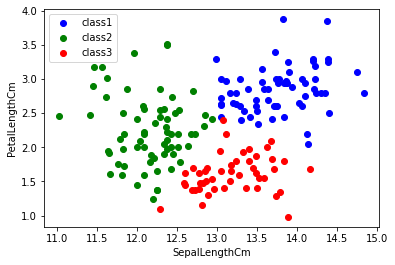

In [15]:
import matplotlib.pyplot as plt

plt.plot(X[X['cluster']==0]['Alcohol'], X[X['cluster']==0]['Total_Phenols'], 'bo', label='class1')

plt.plot(X[X['cluster']==1]['Alcohol'], X[X['cluster']==1]['Total_Phenols'], 'go', label='class2')

plt.plot(X[X['cluster']==2]['Alcohol'], X[X['cluster']==2]['Total_Phenols'], 'ro', label='class3')

plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.legend(loc=0)
plt.show()

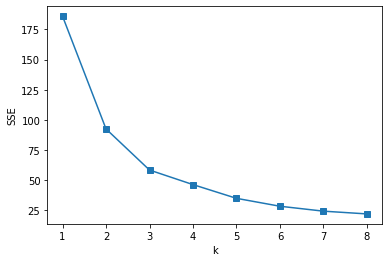

In [16]:
X = df.loc[:,['Alcohol','Total_Phenols']]

SSE = []

for k in range(1,9):
    kmeans = KMeans(n_clusters = k) 
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
 
plt.plot(range(1,9), SSE, marker='s');
plt.xlabel('k')
plt.ylabel('SSE');
plt.show()

In [17]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
Y_pred = kmeans.labels_
Y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0,
       2, 0, 2, 0, 1, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 2], dtype=int32)